<h2 align=center>Tumor Diagnosis : Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Loading Libraries and Data

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt
import time

In [6]:
data = pd.read_csv('data/data.csv')

### Separate Target from Features
***

In [7]:
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
524,917897,B,9.847,15.68,63.00,293.2,0.09492,0.08419,0.02330,0.024160,...,22.99,74.32,376.5,0.14190,0.2243,0.08434,0.06528,0.2502,0.09209,NaN
282,89122,M,19.400,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.094640,...,28.65,152.40,1628.0,0.15180,0.3749,0.43160,0.22520,0.3590,0.07787,NaN
231,88199202,B,11.320,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,...,33.75,79.82,452.3,0.09203,0.1432,0.10890,0.02083,0.2849,0.07087,NaN
70,859575,M,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.079510,...,26.58,165.90,1866.0,0.11930,0.2336,0.26870,0.17890,0.2551,0.06589,NaN
180,873592,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,...,32.85,220.80,3216.0,0.14720,0.4034,0.53400,0.26880,0.2856,0.08082,NaN
365,901088,M,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.077850,...,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735,NaN
44,85638502,M,13.170,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.052520,...,29.89,105.50,740.7,0.15030,0.3904,0.37280,0.16070,0.3693,0.09618,NaN
84,8612080,B,12.000,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.018630,...,24.90,87.78,567.9,0.13770,0.2003,0.22670,0.07632,0.3379,0.07924,NaN
89,861598,B,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.070640,...,18.24,109.40,803.6,0.12770,0.3089,0.26040,0.13970,0.3151,0.08473,NaN
258,887181,M,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.137700,...,31.64,143.70,1226.0,0.15040,0.5172,0.61810,0.24620,0.3277,0.10190,NaN


In [8]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [9]:
y = data.diagnosis
drop_cols = ['Unnamed: 32', 'id', 'diagnosis']
x = data.drop(drop_cols, axis = 1)
print(x.sample(10))
print(y)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
491       17.850         13.23          114.60      992.1          0.07838   
82        25.220         24.91          171.50     1878.0          0.10630   
12        19.170         24.80          132.40     1123.0          0.09740   
65        14.780         23.94           97.40      668.3          0.11720   
172       15.460         11.89          102.50      736.9          0.12570   
251       11.500         18.45           73.28      407.4          0.09345   
518       12.880         18.22           84.45      493.1          0.12180   
71         8.888         14.64           58.79      244.0          0.09783   
353       15.080         25.74           98.00      716.6          0.10240   
471       12.040         28.14           76.85      449.9          0.08752   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
491           0.06217         0.04445              0.04178      

### Diagnosis Distribution Plot
***

Number of Benign Tumors 357
Number of Malignant Tumors 212


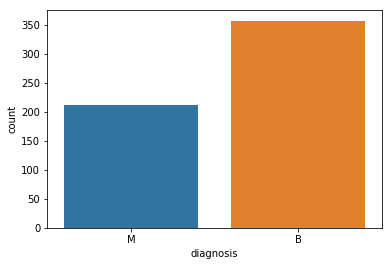

In [10]:
ax = sns.countplot(y, label = 'Count')
B, M = y.value_counts()
print('Number of Benign Tumors', B)
print('Number of Malignant Tumors', M)

In [11]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualizing Standardized Data with Seaborn
***

### Violin and Box Plots
***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

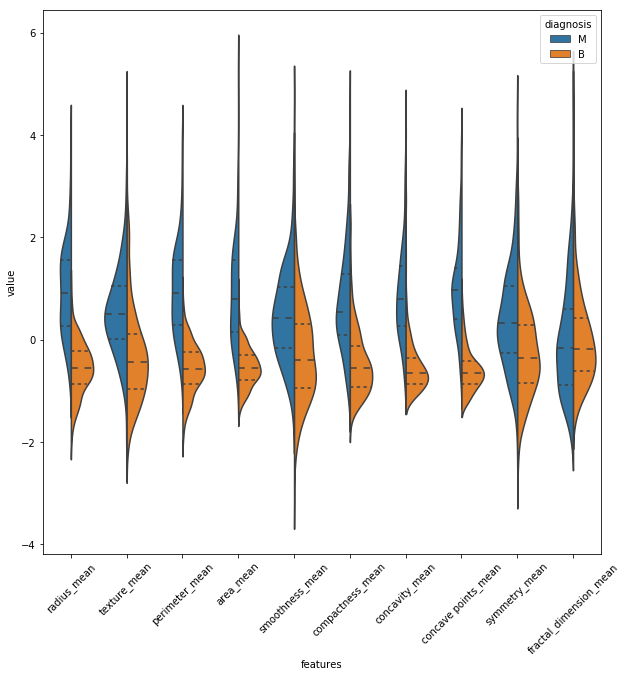

In [12]:
data = x
data_std = (data - data.mean())/ data.std() # Standardize data
data = pd.concat([y, data_std.iloc[:,0:10]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = data, split = True, inner = 'quart')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

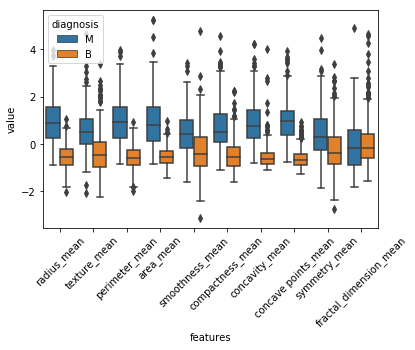

In [13]:
sns.boxplot(x='features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

### Joint Plots for Feature Comparison
***

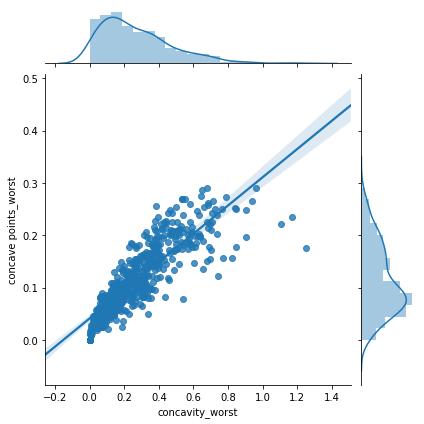

In [14]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:, 'concave points_worst'], kind = 'regg')

### Observing the Distribution of Values with Swarm Plots
***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

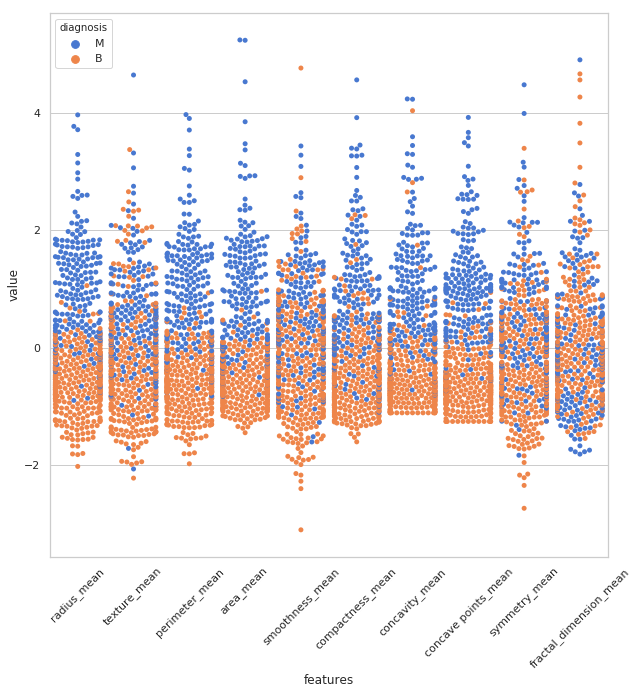

In [15]:
sns.set(style = 'whitegrid', palette = 'muted')
data = x
data_std = (data - data.mean())/ data.std() # Standardize data
data = pd.concat([y, data_std.iloc[:,0:10]], axis = 1)
data = pd.melt(data, id_vars = 'diagnosis', var_name = 'features', value_name = 'value')
plt.figure(figsize = (10,10))
sns.swarmplot(x = 'features', y = 'value', hue = 'diagnosis', data = data)
plt.xticks(rotation = 45)

### Observing all Pair-wise Correlations
***

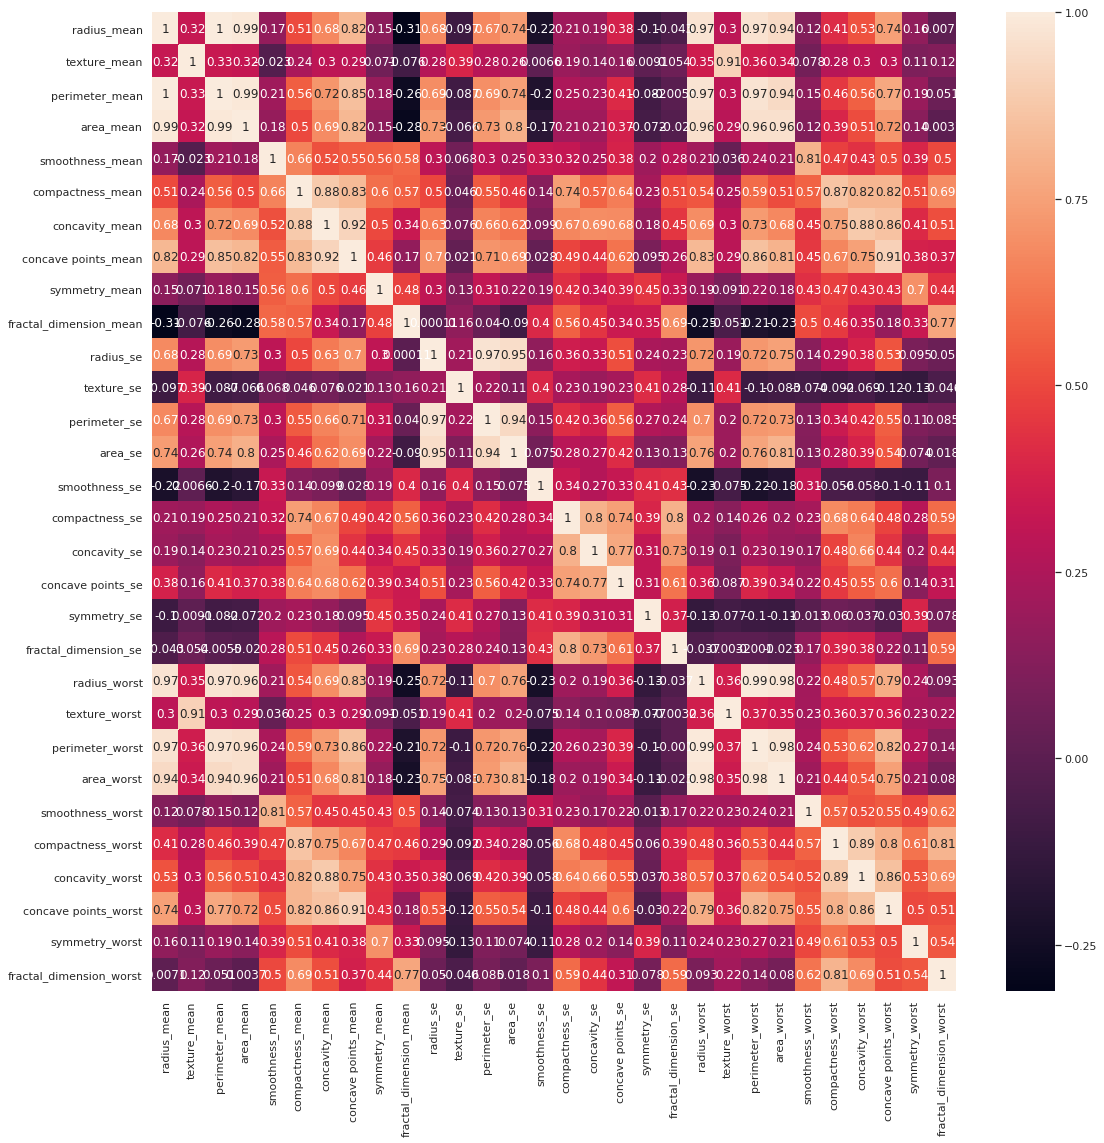

In [19]:
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(x.corr(), annot = True, ax = ax)